## Arya.AI Assignment:

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import sklearn
import pickle

import warnings
warnings.filterwarnings("ignore")

### Loading the Training Data Set:

In [2]:
df=pd.read_csv(r"training_set.csv")

In [3]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


#### Here the column "Unnamed: 0" is acting like index itself. We can remove column "Unnamed: 0". The Y is our target column.

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


### Exploratory Data Analysis:

#### Checking for Null values in the data set:

In [5]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

There is no null value in the data set

#### Checking for the data type of each feature in the data set:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

There are all values are in either float or in integers.

#### Checking for statistical distribution of the data set:

In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


#### Cheking the distribution of target column:

In [8]:
df['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

<AxesSubplot:ylabel='Y'>

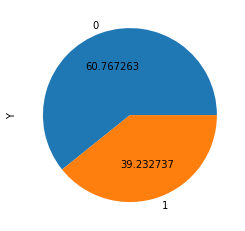

In [9]:
y=df['Y']
y.value_counts().plot(kind='pie', autopct='%2f')


* Here the majority class which is '0' is 60.76% and minority class which is '1' is 39.23%

#### Checking skewness of our model

Here all variables are numerical. So, no need of conversion.

In [10]:
skew=pd.DataFrame((df.drop(['Y'],axis=1)).skew(axis=0).sort_values(ascending=False)).T
skew

,X56,X54,X38,X4,X55,X48,X47,X44,X52,X51,...,X11,X18,X37,X6,X5,X9,X3,X12,X21,X19
0,31.10373,30.813019,28.9348,27.536596,25.550425,19.39074,18.831605,18.692023,18.637518,15.875979,...,5.405502,4.933591,4.825109,4.564394,4.359841,4.157358,2.916021,2.866084,2.420315,1.599187


### 
* A large negative value means the distribution is negatively skewed. A large positive value means the distribution is positively skewed.
* A value of zero means no skewness at all.
* The direction of skewness is given by the sign.
* The ensamble techniques like Decision trees, Random Forest are not affected by skewness.

In [11]:
skewness_of_y = df['Y'].skew()
skewness_of_y

0.4412074655482515


* Checking skewness by using plot:

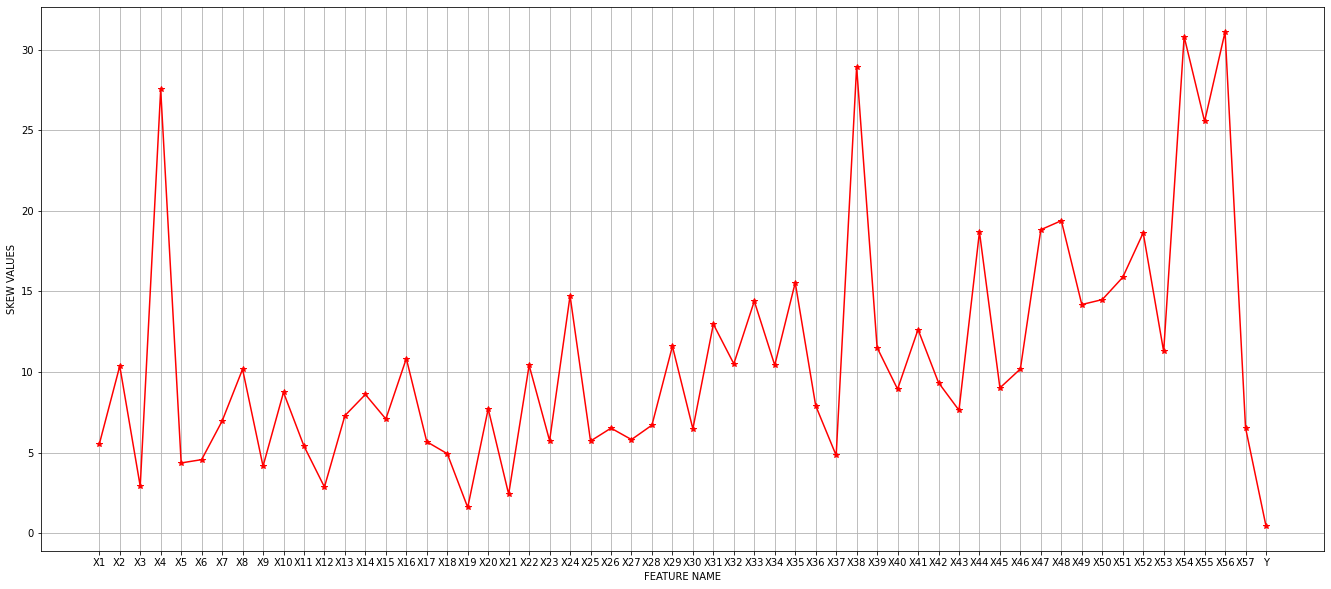

In [12]:
plt.figure(figsize=(23,10))
plt.xlabel("FEATURE NAME")
plt.ylabel("SKEW VALUES")
plt.plot(df.skew(axis=0),'r-*')
plt.grid(visible=True)
plt.show()


####  *The Skew values density distribution for features 

<AxesSubplot:xlabel='Skew Values of features', ylabel='Density'>

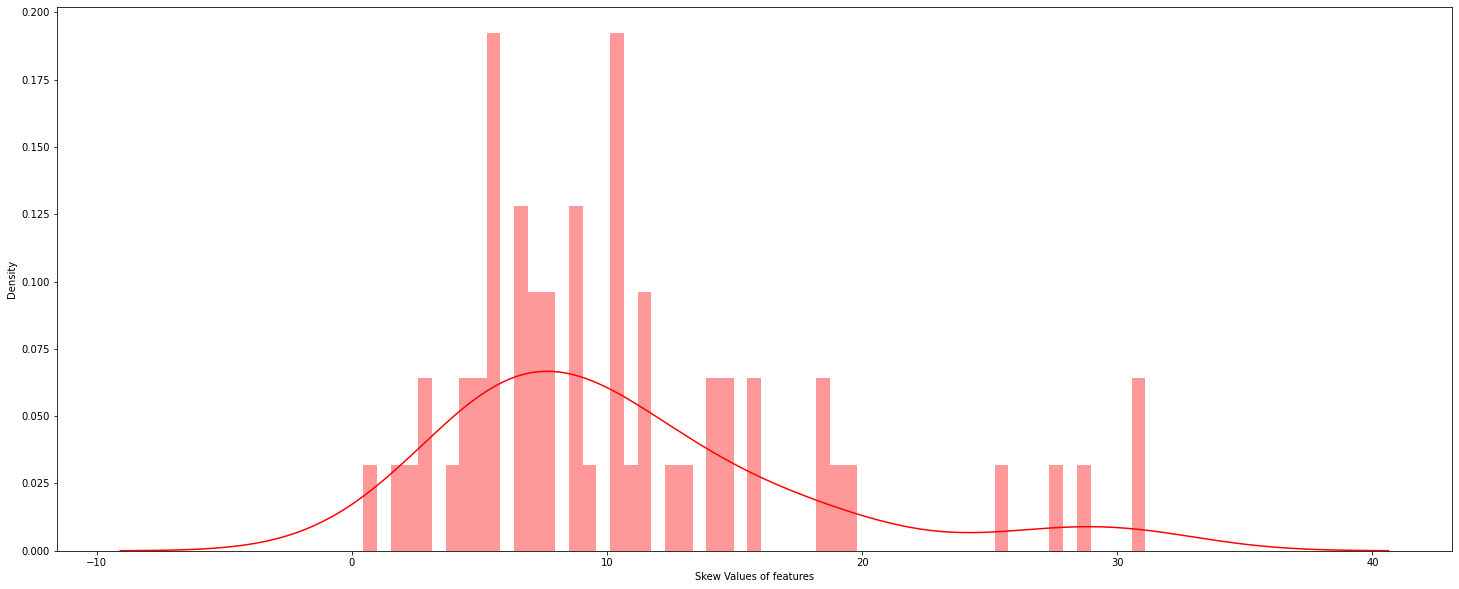

In [13]:
plt.figure(figsize=(25,10))
plt.xlabel('Skew Values of features')
sns.distplot(df.skew(axis = 0),bins=57,color='r')

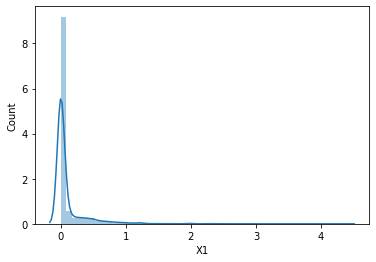

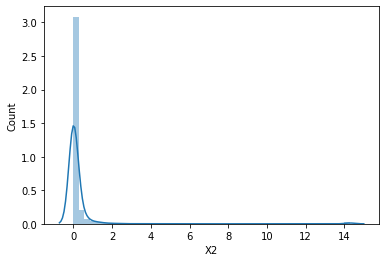

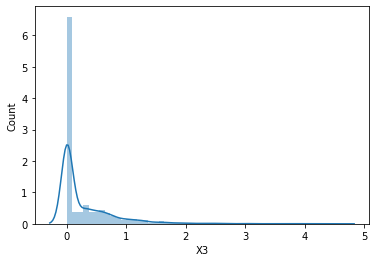

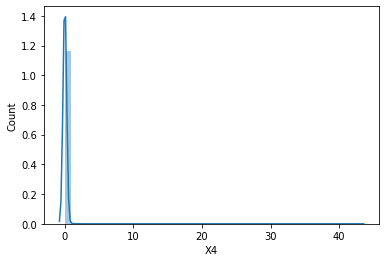

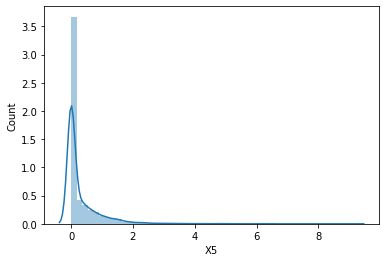

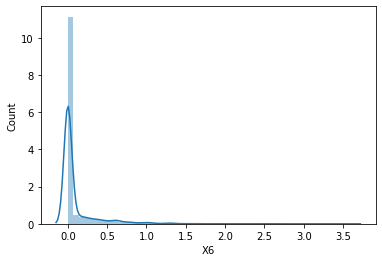

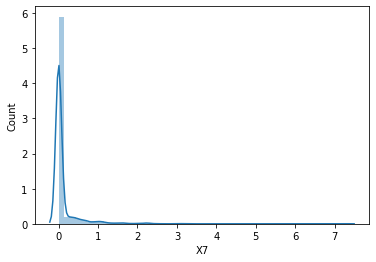

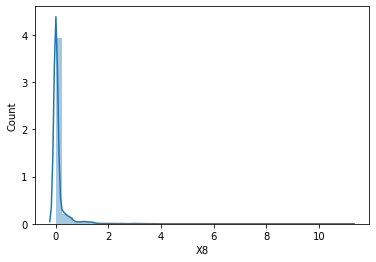

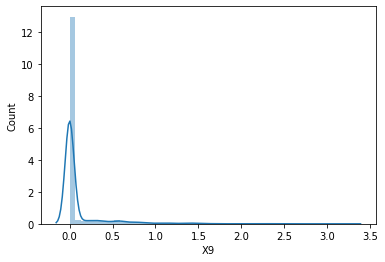

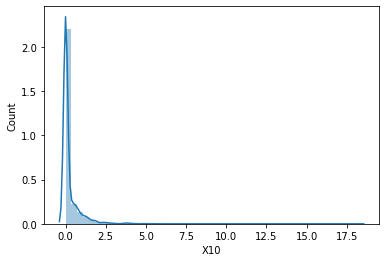

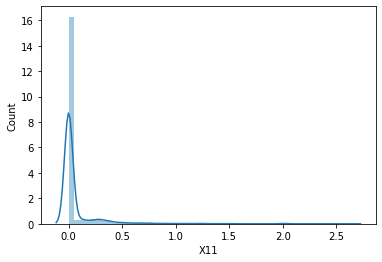

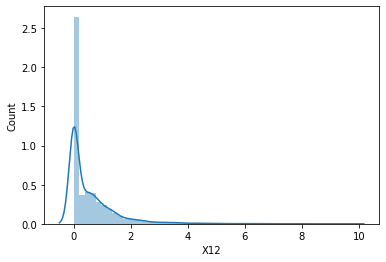

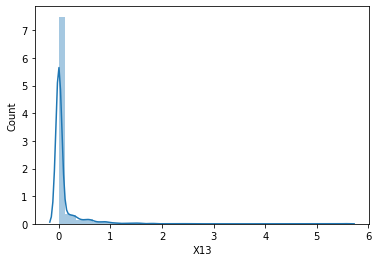

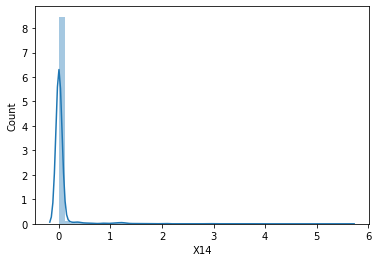

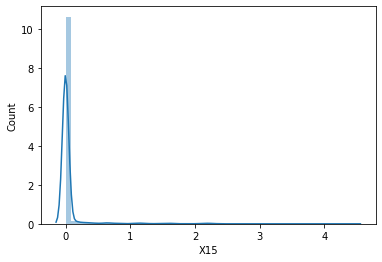

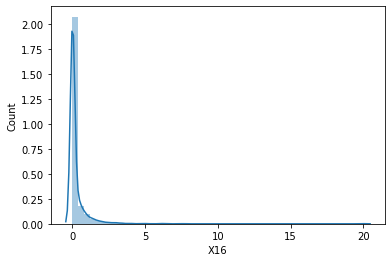

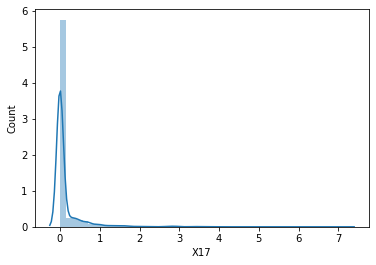

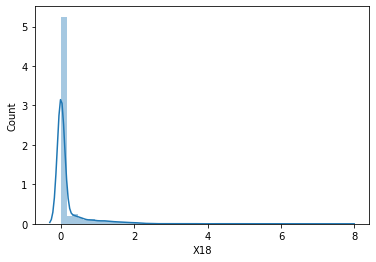

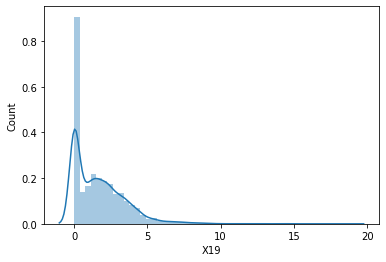

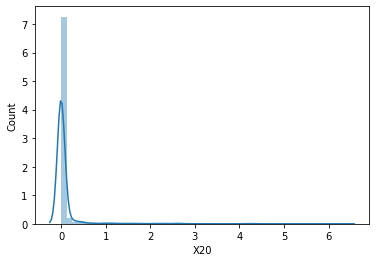

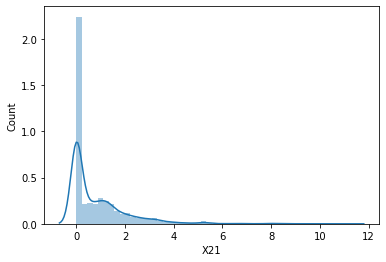

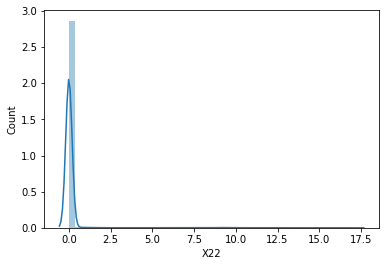

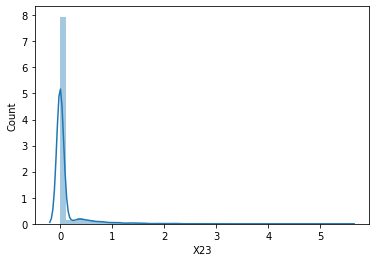

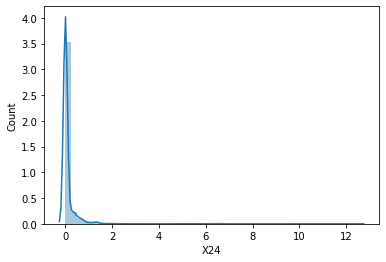

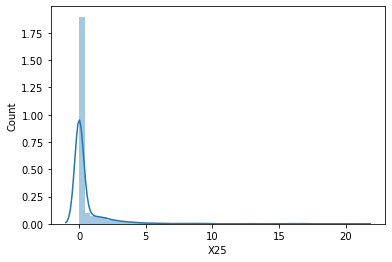

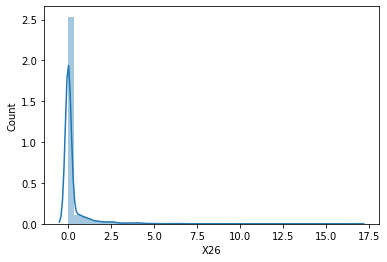

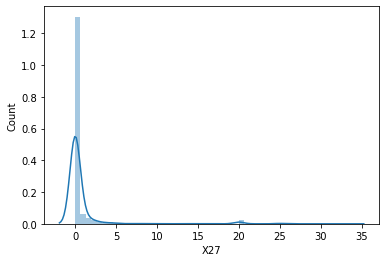

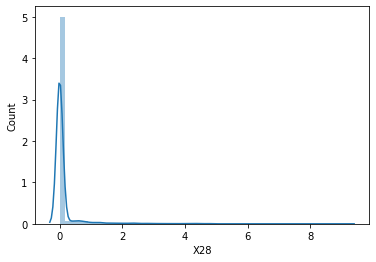

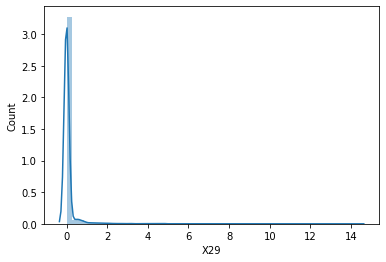

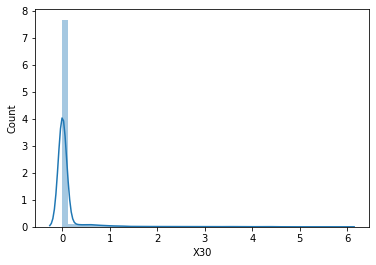

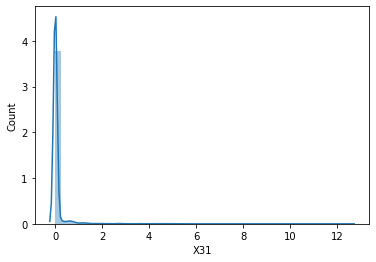

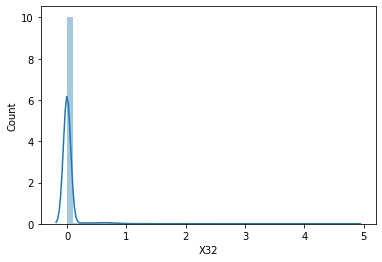

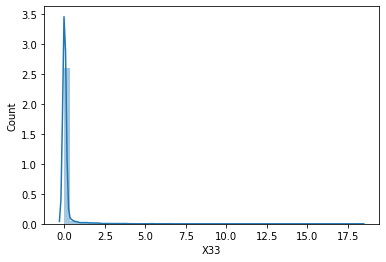

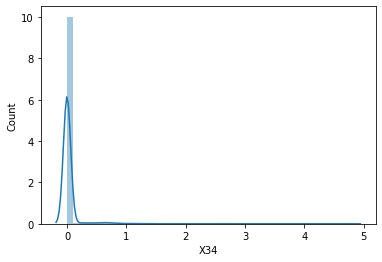

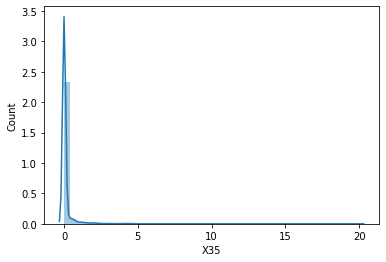

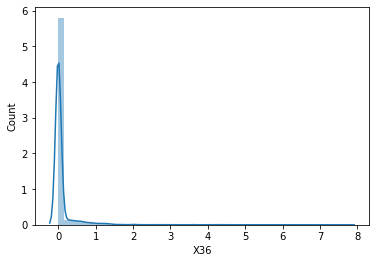

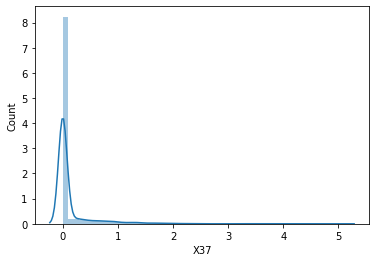

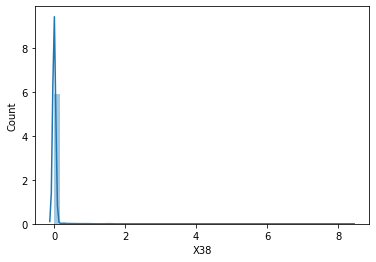

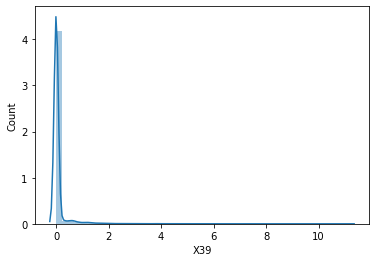

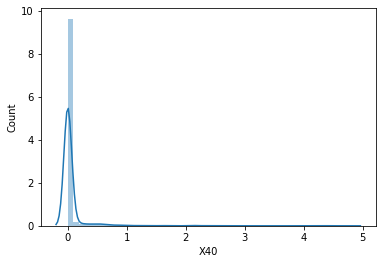

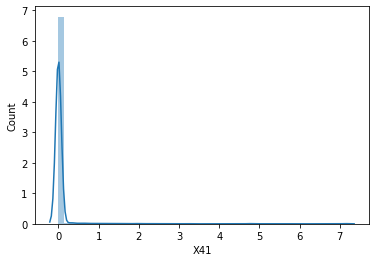

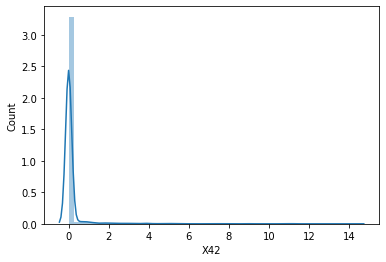

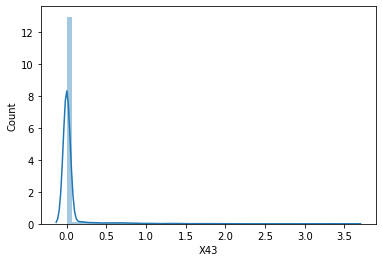

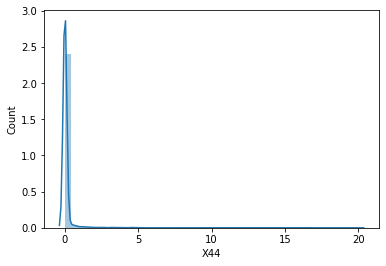

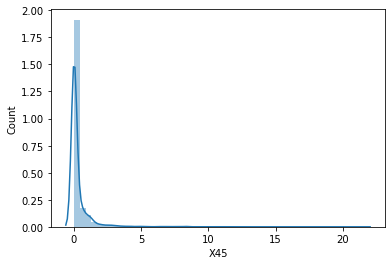

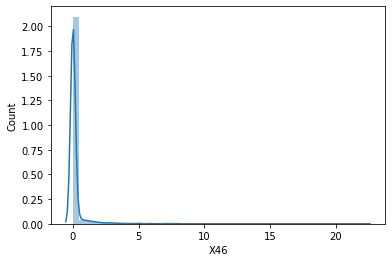

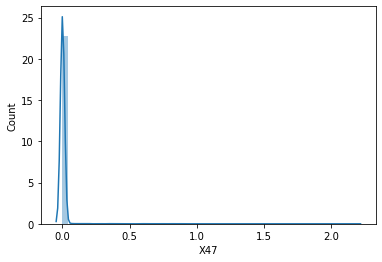

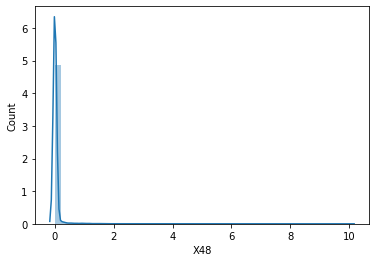

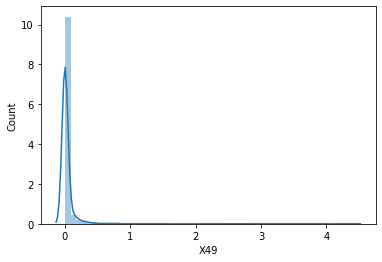

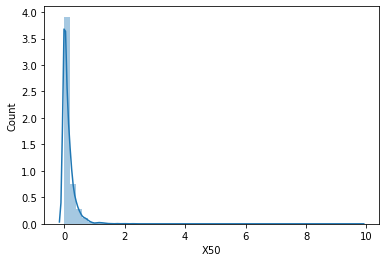

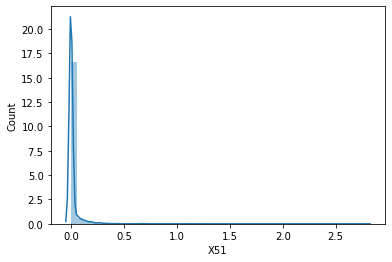

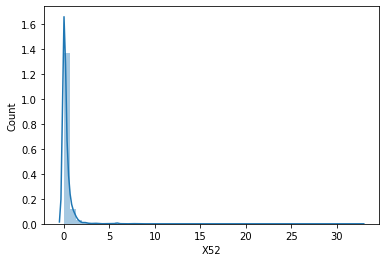

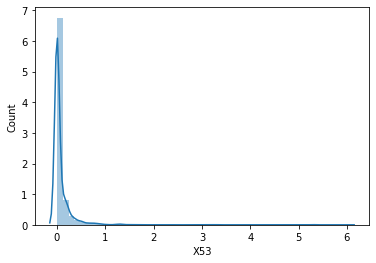

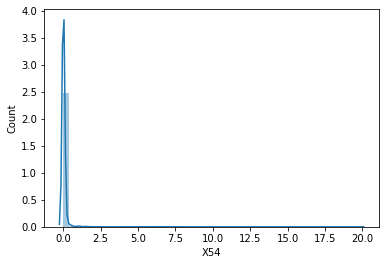

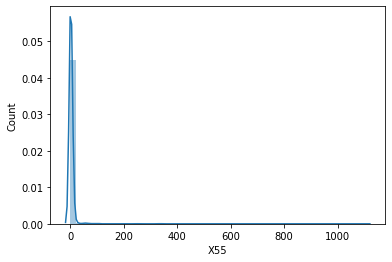

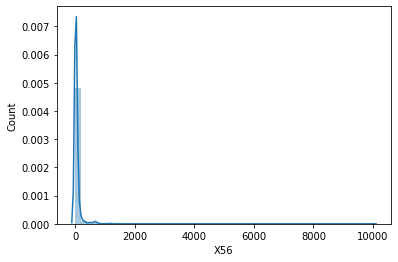

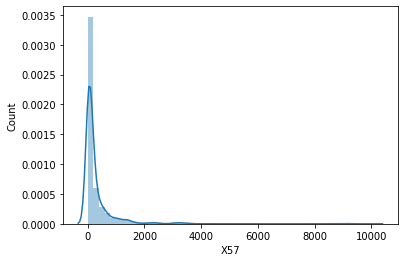

In [14]:
for column in df.columns:
    if column!='Y':
        sns.distplot(df[column], kde=True)
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

### Checking correlation by using heat map:

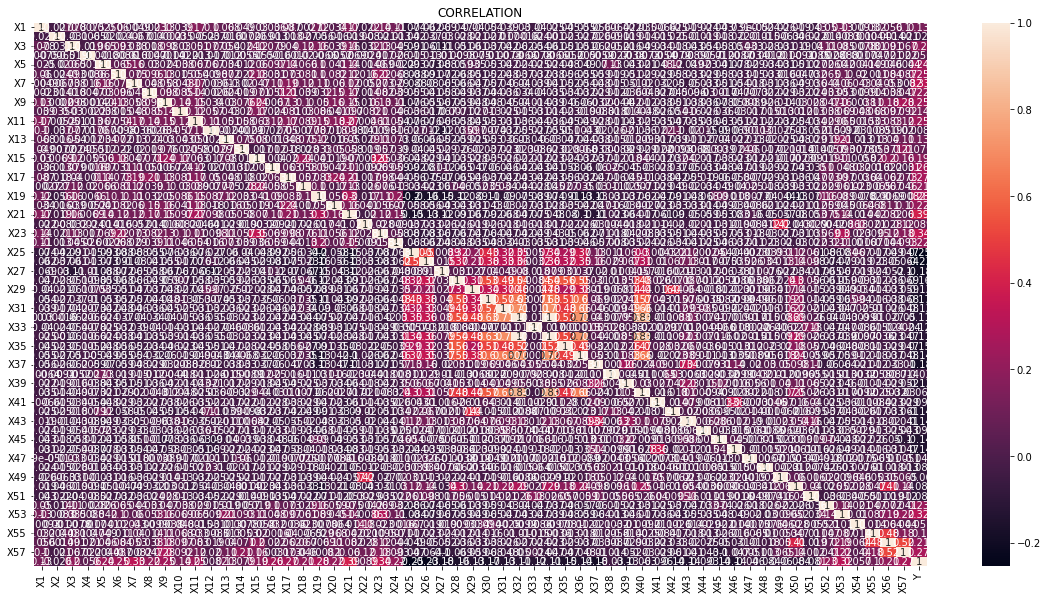

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title("CORRELATION")
plt.show()

In [16]:
df.drop(['Y'],axis=1).corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
X1,1.000000,-0.026677,0.078010,0.007472,0.025377,0.060360,0.004934,0.002262,0.128300,0.038547,...,-0.023943,-0.026043,-0.019084,-0.042516,0.049536,0.128384,-0.009324,0.032279,0.056025,0.101600
X2,-0.026677,1.000000,-0.030758,-0.006455,-0.020289,-0.023827,0.006748,-0.014461,0.000199,0.035494,...,-0.015188,-0.006349,-0.045741,-0.021728,-0.014497,-0.008293,0.001034,0.004376,0.001448,-0.021016
X3,0.078010,-0.030758,1.000000,-0.018648,0.065148,0.093120,0.037979,0.018314,0.098008,0.029760,...,-0.028276,-0.031217,-0.019428,-0.039784,0.109943,0.084654,-0.007824,0.080559,0.091124,0.067387
X4,0.007472,-0.006455,-0.018648,1.000000,0.001837,-0.008594,0.015680,0.004700,0.000138,-0.002183,...,-0.001247,0.001048,-0.009132,-0.008458,-0.002776,0.008798,-0.001704,0.004715,0.020733,0.021542
X5,0.025377,-0.020289,0.065148,0.001837,1.000000,0.065459,0.157810,0.030440,0.023903,0.038379,...,-0.033886,-0.030872,-0.050698,-0.026512,0.025764,0.042036,0.004088,0.048949,0.045998,0.004402
X6,0.060360,-0.023827,0.093120,-0.008594,0.065459,1.000000,0.074811,0.095892,0.132624,0.015163,...,-0.033412,-0.015690,-0.004675,-0.031567,0.065323,0.104906,0.020024,-0.010804,0.083647,0.086964
X7,0.004934,0.006748,0.037979,0.015680,0.157810,0.074811,1.000000,0.047656,0.057607,0.048401,...,-0.030549,-0.035855,-0.049371,-0.035751,0.044416,0.060073,0.043426,0.040228,0.053253,-0.008160
X8,0.002262,-0.014461,0.018314,0.004700,0.030440,0.095892,0.047656,1.000000,0.097821,0.085445,...,-0.021824,-0.028603,-0.032195,-0.023941,0.032774,0.052817,-0.009910,0.013975,0.037654,0.046959
X9,0.128300,0.000199,0.098008,0.000138,0.023903,0.132624,0.057607,0.097821,1.000000,0.138875,...,-0.026076,-0.014399,-0.030304,0.028297,0.046721,0.160436,-0.003807,0.105594,0.181932,0.276767
X10,0.038547,0.035494,0.029760,-0.002183,0.038379,0.015163,0.048401,0.085445,0.138875,1.000000,...,-0.015282,0.013110,0.001187,0.012993,0.038433,0.069121,0.048458,0.068394,0.097029,0.092385


### Data Distribution:

* Here I will take some random columns for visualization and for simplicity

In [17]:
data=df[['X1','X2','X11','X12','Y']]
data

,X1,X2,X11,X12,Y
0,0.00,0.00,0.00,0.00,0
1,0.00,0.56,0.00,0.56,1
2,0.00,0.00,0.00,0.00,0
3,0.64,0.00,0.00,1.29,1
4,0.58,0.00,0.00,0.00,1
...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0
3906,0.00,0.00,0.00,0.00,0
3907,0.12,0.00,0.00,0.12,0
3908,0.00,0.00,0.00,0.00,1


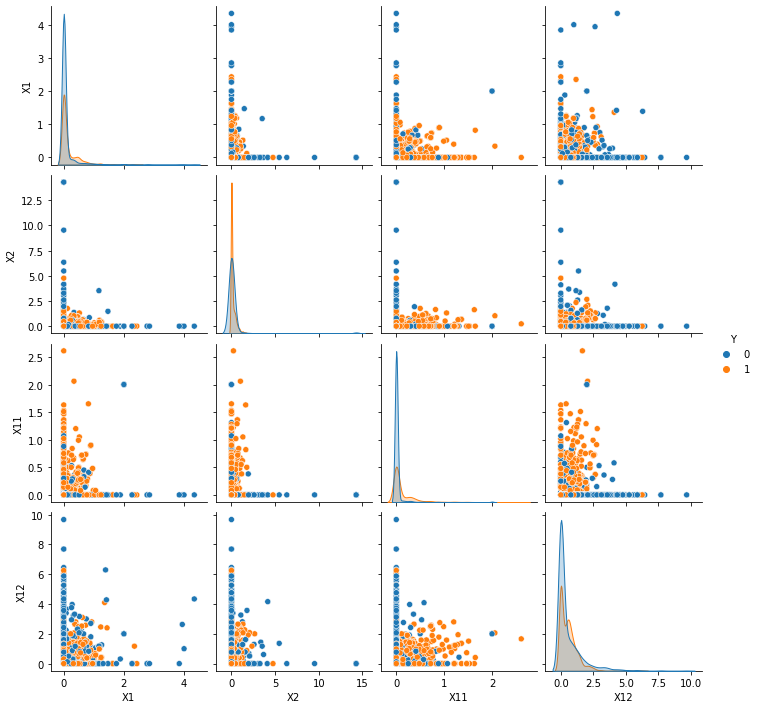

In [18]:
sns.pairplot(data,diag_kind='kde', hue='Y')

In [19]:
data1=df[['X27','X19','X45','X42','X57','Y']]
data1

,X27,X19,X45,X42,X57,Y
0,0.0,0.00,0.00,0.0,12,0
1,0.0,3.38,0.56,0.0,375,1
2,0.0,8.10,2.70,0.0,5,0
3,0.0,1.93,0.00,0.0,122,1
4,0.0,0.58,0.00,0.0,207,1
...,...,...,...,...,...,...
3905,0.0,7.31,0.00,0.0,12,0
3906,0.0,0.00,0.00,0.0,4,0
3907,0.0,2.19,0.25,0.0,131,0
3908,0.0,0.00,1.04,0.0,81,1


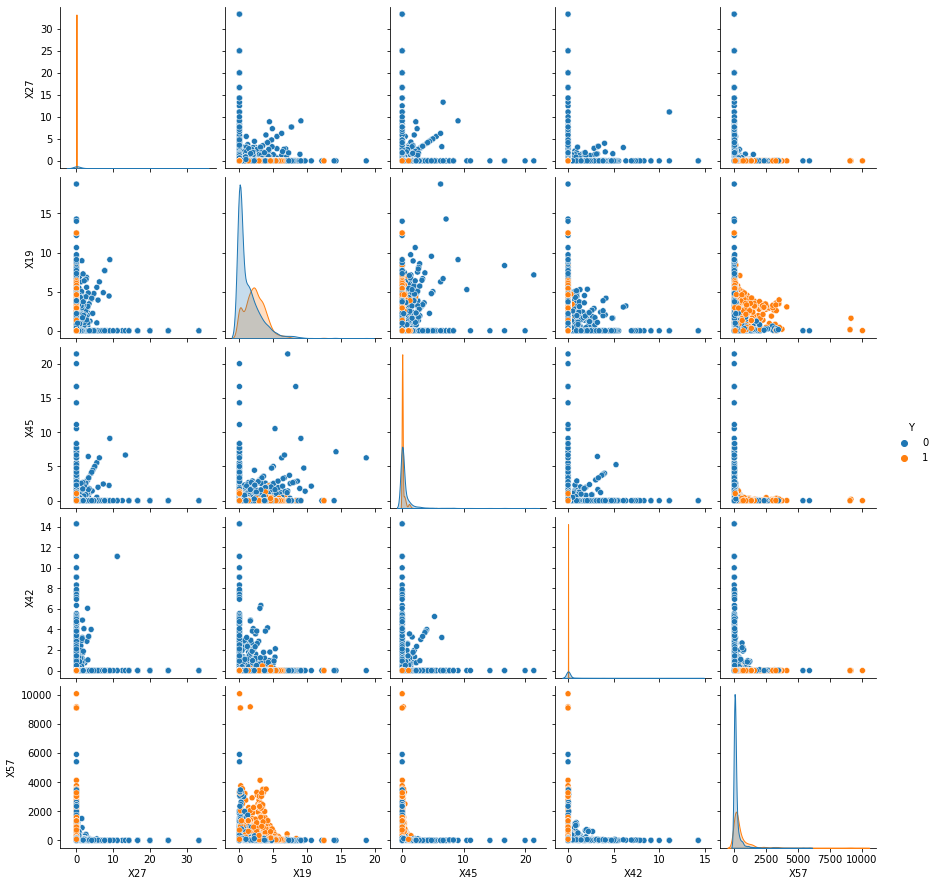

In [20]:
sns.pairplot(data1,diag_kind='kde', hue='Y')


* From above both pairplot and from head map I can understood that most of the features has no good correlation.

### Checking for Outliers:

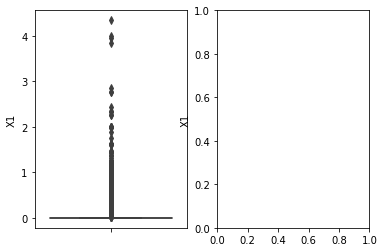

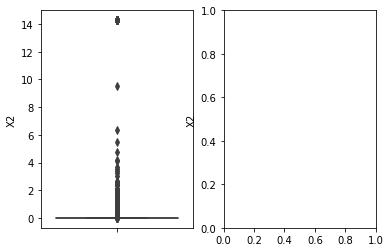

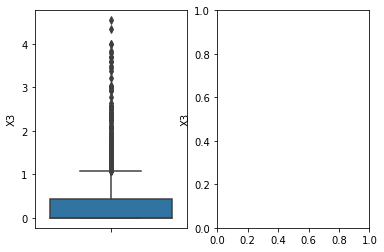

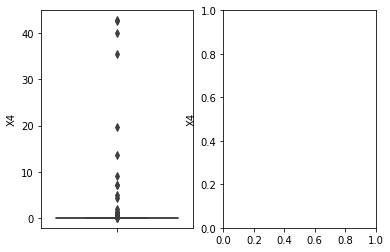

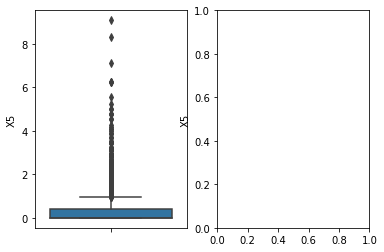

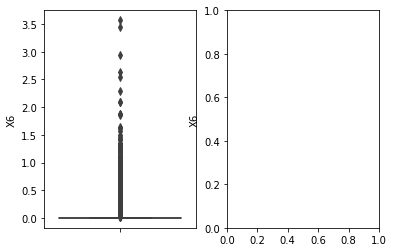

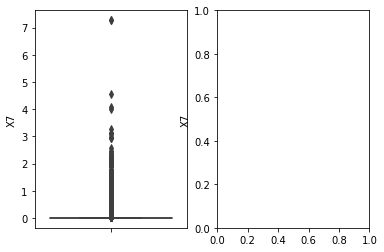

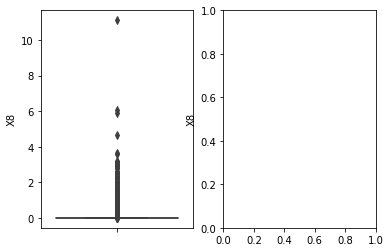

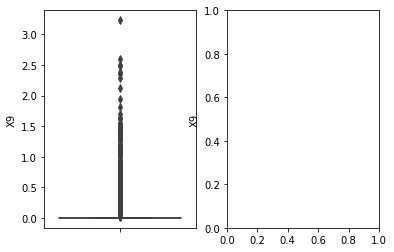

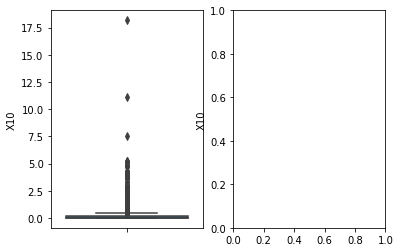

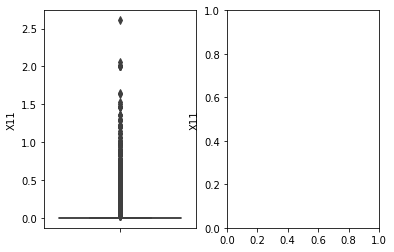

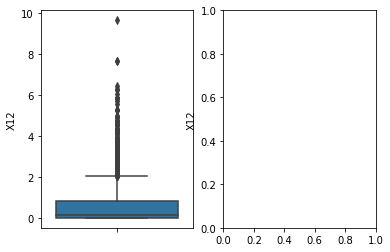

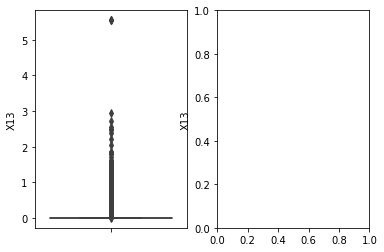

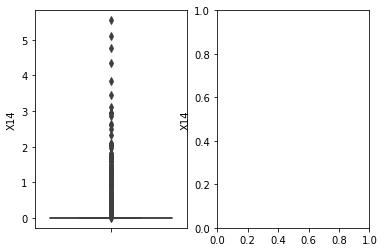

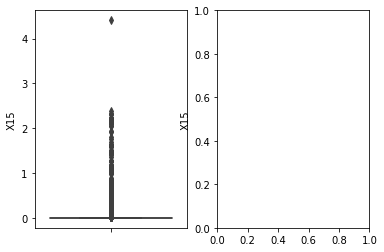

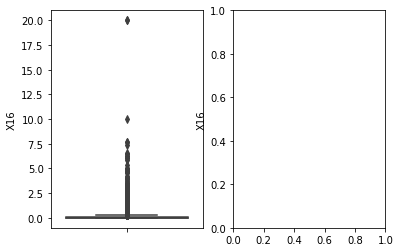

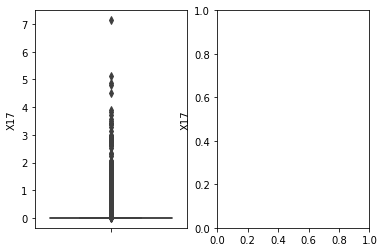

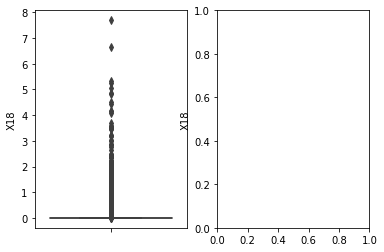

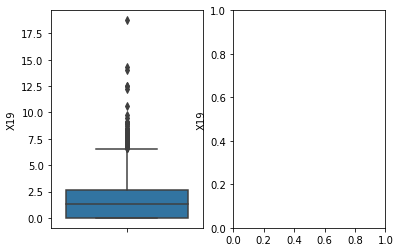

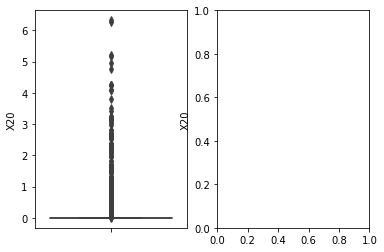

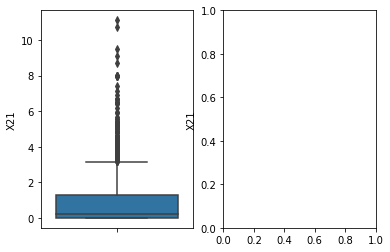

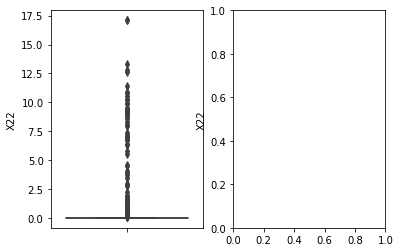

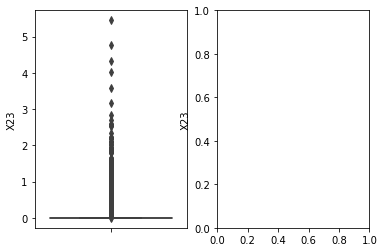

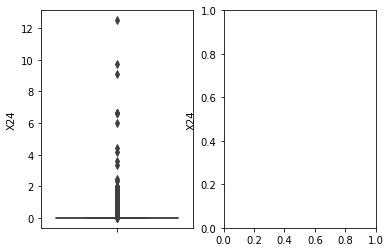

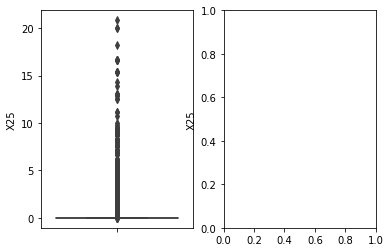

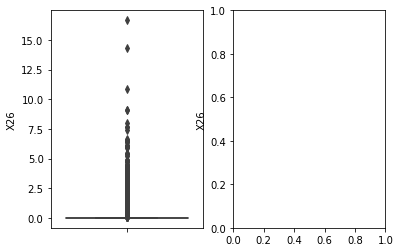

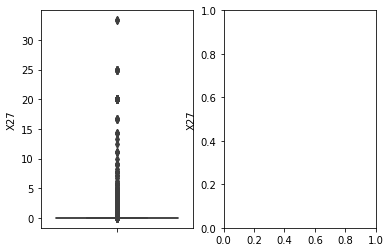

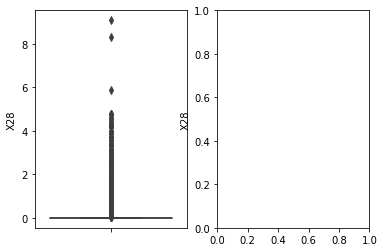

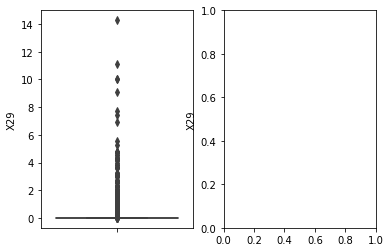

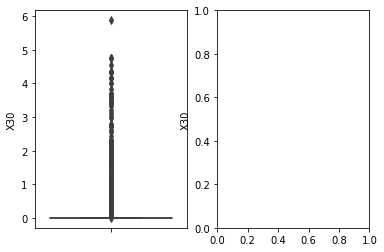

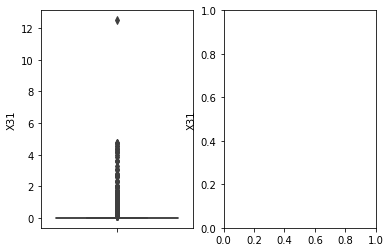

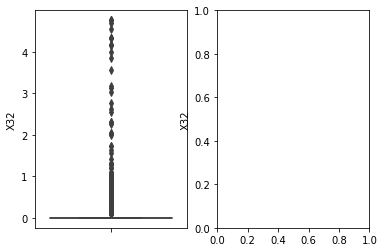

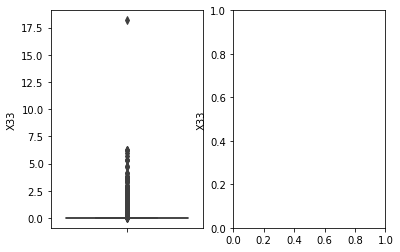

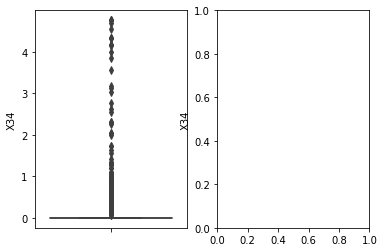

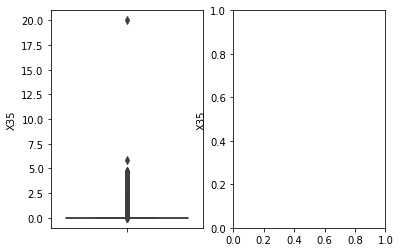

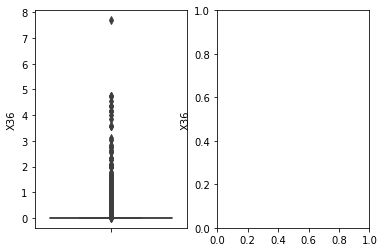

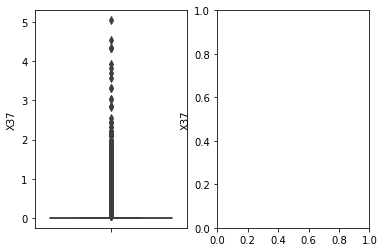

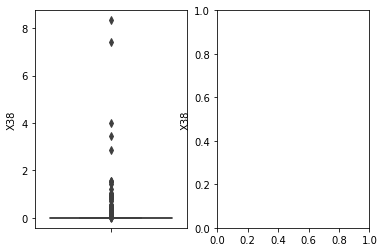

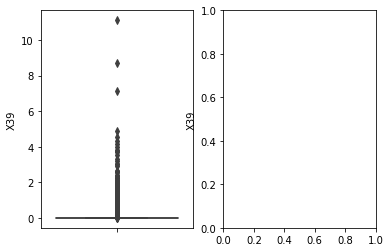

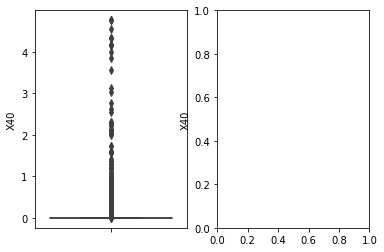

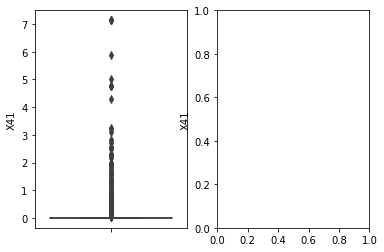

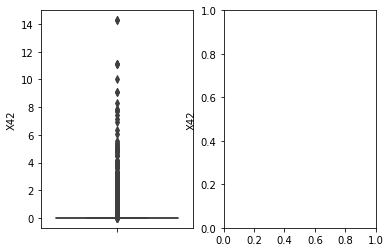

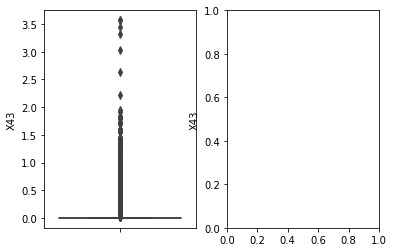

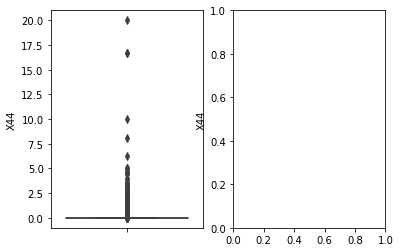

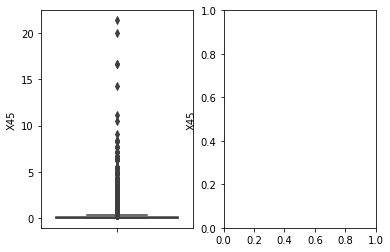

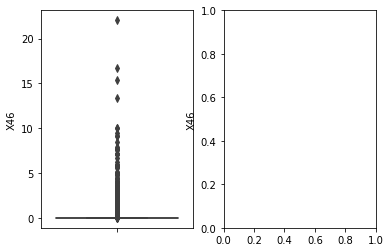

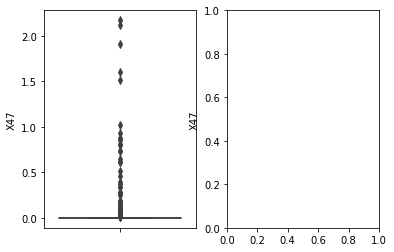

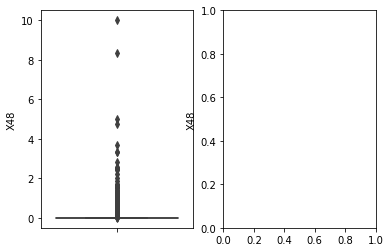

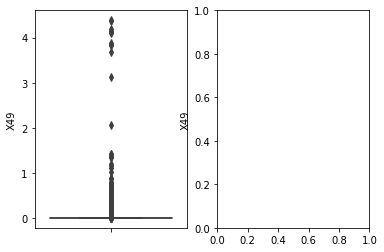

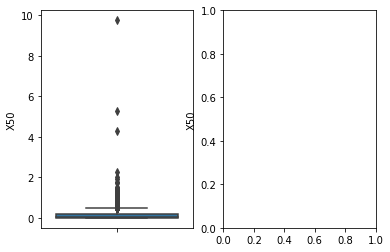

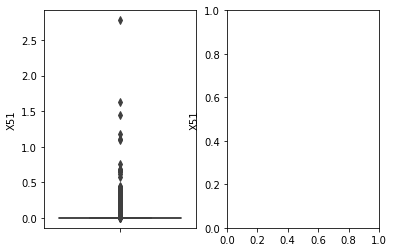

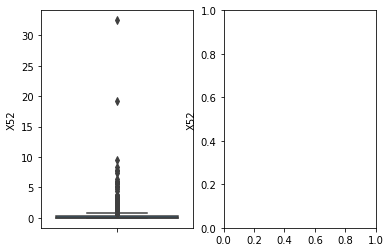

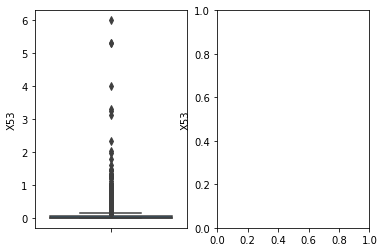

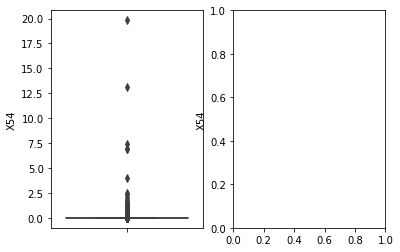

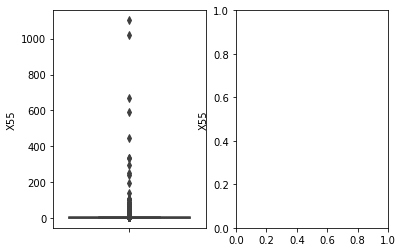

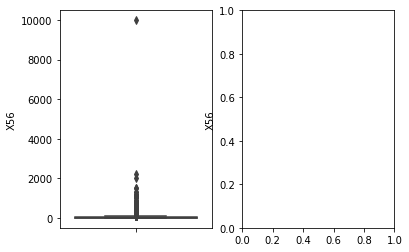

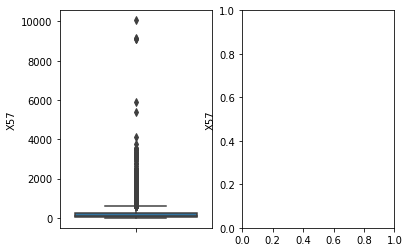

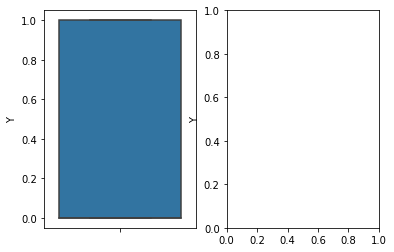

In [21]:
for column in df.columns:
    figure, axes=plt.subplots(1,2)
    sns.boxplot(ax=axes[0],y=df[column])
    plt.ylabel(column)
    plt.show()

### Feature Selection (ANOVA_F Test)

Feature X1: 60.229467
Feature X2: 2.372980
Feature X3: 129.475185
Feature X4: 8.917299
Feature X5: 185.161138
Feature X6: 197.971396
Feature X7: 360.826096
Feature X8: 162.100066
Feature X9: 212.731073
Feature X10: 65.572703
Feature X11: 199.497952
Feature X12: 0.069052
Feature X13: 61.583666
Feature X14: 22.277649
Feature X15: 123.243331
Feature X16: 210.703137
Feature X17: 260.139148
Feature X18: 147.083274
Feature X19: 244.916102
Feature X20: 155.020734
Feature X21: 564.251269
Feature X22: 20.894963
Feature X23: 381.788811
Feature X24: 148.089956
Feature X25: 209.935708
Feature X26: 170.169099
Feature X27: 110.155601
Feature X28: 74.843451
Feature X29: 62.781024
Feature X30: 94.952892
Feature X31: 52.695178
Feature X32: 44.188742
Feature X33: 40.281131
Feature X34: 42.775444
Feature X35: 67.089008
Feature X36: 58.127643
Feature X37: 110.030005
Feature X38: 2.105336
Feature X39: 60.827399
Feature X40: 15.140857
Feature X41: 30.301374
Feature X42: 60.629248
Feature X43: 60.205555
Feat

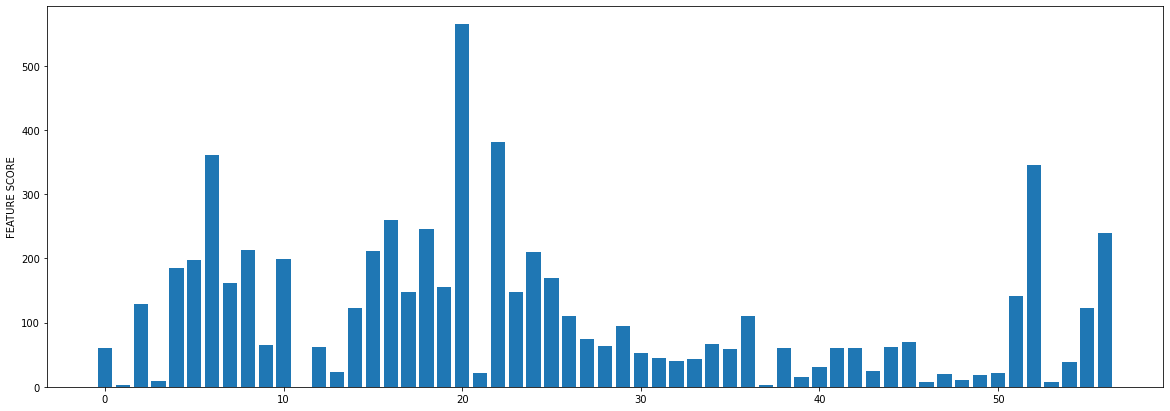

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

 
# loading the dataset
def split_data(data_received):
    dataset = df.values
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = split_data(data)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs_anova, X_test_fs_anova, fs_anova = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_anova.scores_)):
    print('Feature X%d: %f' % (i+1, fs_anova.scores_[i]))

    
# plot the scores
plt.figure(figsize = (20,7))
plt.bar([i for i in range(len(fs_anova.scores_))], fs_anova.scores_)
plt.ylabel('FEATURE SCORE')
plt.show()

### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_data = pd.DataFrame(std.fit_transform(df.drop(['Y'],axis =1)))
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.347605,-0.164652,8.042197,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,1.245193,-0.302852,-0.096793,-0.122548,-0.246250,-0.468745
1,-0.347605,0.282037,0.546475,-0.045337,1.232552,1.775006,5.488745,-0.266004,-0.335858,0.473260,...,-0.110359,-0.159527,-0.203612,-0.189925,0.267935,-0.302852,0.086510,0.358578,0.467970,0.158994
2,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.128919,-0.251141,-0.480850
3,1.812483,-0.164652,0.705115,-0.045337,2.467099,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,0.220179,1.137073,-0.096793,-0.083049,-0.148411,-0.278521
4,1.609975,-0.164652,-0.564002,25.853264,0.409520,-0.367125,1.200824,1.188930,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.039569,0.627262,-0.096793,-0.054444,0.345672,-0.131530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.106175,-0.236466,-0.468745
3906,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.504039,-0.189925,-0.317954,-0.302852,-0.096793,-0.097065,-0.241358,-0.482579
3907,0.057412,-0.164652,-0.326043,-0.045337,-0.474477,0.589184,-0.288394,-0.266004,-0.335858,-0.366346,...,-0.110359,-0.159527,-0.167415,-0.189925,-0.291164,-0.302852,-0.096793,-0.121051,-0.231574,-0.262957
3908,-0.347605,-0.164652,-0.564002,-0.045337,-0.474477,-0.367125,-0.288394,7.560539,-0.335858,-0.366346,...,-0.110359,-0.159527,0.212643,-0.189925,-0.087326,0.467702,-0.096793,-0.037911,-0.133736,-0.349422


### Model fitting for Binary Classification:

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer

In [25]:
RF_bin_clf = RandomForestClassifier(n_estimators=50, class_weight='balanced_subsample')

RF_bin_clf.fit(scaled_data,y)

RF_bin_clf.score(scaled_data,y)

0.99923273657289

### K-fold Cross Validation:

In [26]:
bin_clf_CV = KFold(n_splits=50, shuffle=True, random_state=1)

bin_clf_score = cross_val_score(RF_bin_clf, scaled_data, y , scoring='f1', cv=bin_clf_CV, n_jobs=-1)
# summarize performance

bin_clf_score

array([0.97959184, 0.92957746, 0.96153846, 0.94117647, 0.92063492,
       0.92307692, 0.94444444, 0.97058824, 0.96875   , 0.92537313,
       0.98181818, 0.93939394, 0.96666667, 0.95081967, 0.95238095,
       0.92307692, 0.90909091, 0.875     , 0.92307692, 0.95238095,
       0.90625   , 0.91525424, 0.98360656, 0.90322581, 0.93333333,
       0.91666667, 0.92592593, 0.93150685, 0.97297297, 0.94736842,
       0.92063492, 0.8852459 , 0.97222222, 0.91428571, 0.86792453,
       0.86206897, 0.95652174, 0.96969697, 0.98507463, 0.96428571,
       0.95652174, 0.94736842, 0.9122807 , 0.93670886, 0.96551724,
       0.94117647, 0.9122807 , 0.95238095, 0.91525424, 0.98305085])

In [27]:
# mean F1 for all CV:
np.mean(bin_clf_score)

0.9379013851590919


* Mean F1 score after Cross Validation is 0.9395

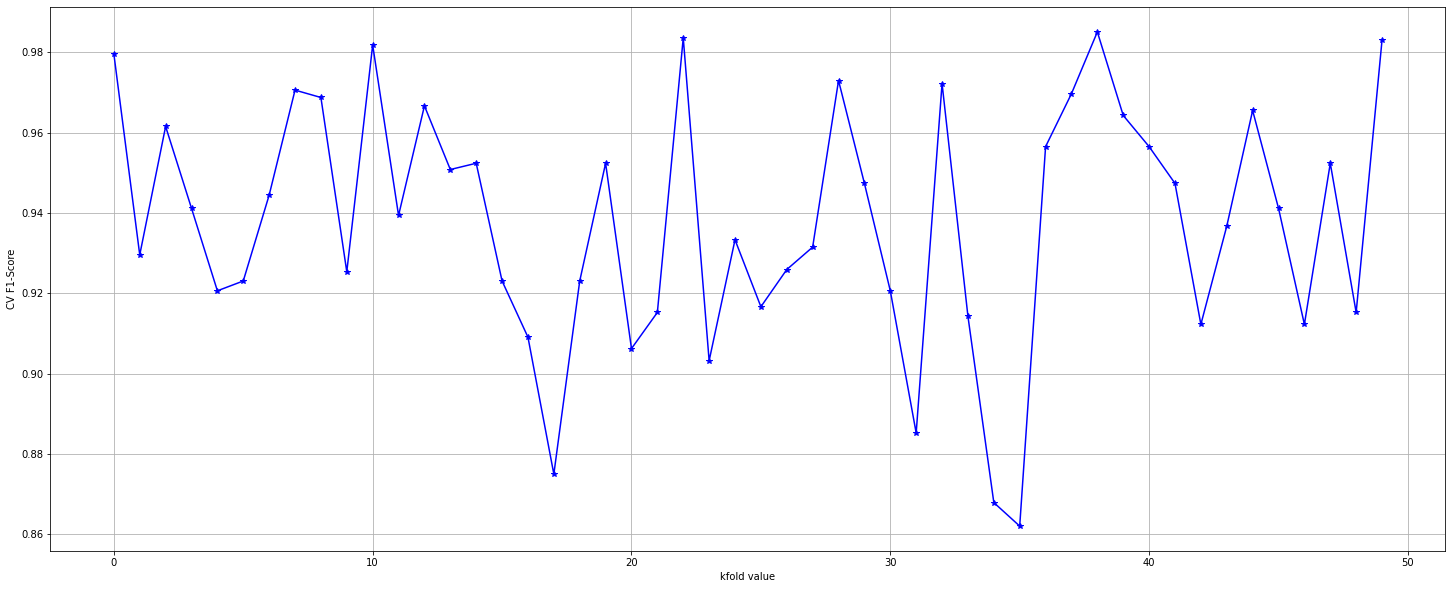

In [28]:
plt.figure(figsize=(25,10))
plt.xlabel('kfold value')
plt.ylabel('CV F1-Score')
plt.plot(bin_clf_score,'b-*')
plt.grid(visible=True)
plt.show()

## Random Forest Model with Hyperparameter Tunning:

In [29]:
X=df.drop(['Y'], axis=1)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,...,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81


In [31]:
pipe = Pipeline(( 
                ('pt',   PowerTransformer(standardize=True)),
                ('norm', StandardScaler()),
                ('rfc', RandomForestClassifier(class_weight='balanced_subsample')),
                ))

parameters = {'rfc__n_estimators': [20,25,30,35,40,45,50,55,60],
             
              'rfc__max_depth': [10,15,20,25,30,35,40,45,50]
             }

rndscv = RandomizedSearchCV(cv = 5,estimator=pipe,param_distributions=parameters)
rndscv.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=(('pt', PowerTransformer()),
                                             ('norm', StandardScaler()),
                                             ('rfc',
                                              RandomForestClassifier(class_weight='balanced_subsample')))),
                   param_distributions={'rfc__max_depth': [10, 15, 20, 25, 30,
                                                           35, 40, 45, 50],
                                        'rfc__n_estimators': [20, 25, 30, 35,
                                                              40, 45, 50, 55,
                                                              60]})

In [33]:
rndscv_results = pd.DataFrame(rndscv.cv_results_)
rndscv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__n_estimators,param_rfc__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.982216,0.046264,0.023312,0.001247,25,15,"{'rfc__n_estimators': 25, 'rfc__max_depth': 15}",0.947570,0.950128,0.955243,0.942455,0.945013,0.948082,0.004400,8
1,2.692603,0.091211,0.028040,0.000715,35,30,"{'rfc__n_estimators': 35, 'rfc__max_depth': 30}",0.953964,0.951407,0.948849,0.941176,0.951407,0.949361,0.004400,6
2,3.372498,0.423510,0.030461,0.004375,50,50,"{'rfc__n_estimators': 50, 'rfc__max_depth': 50}",0.955243,0.948849,0.946292,0.943734,0.945013,0.947826,0.004076,9
3,3.473977,0.251451,0.033174,0.001173,50,30,"{'rfc__n_estimators': 50, 'rfc__max_depth': 30}",0.951407,0.951407,0.946292,0.942455,0.956522,0.949616,0.004826,4
4,3.846174,0.908476,0.032136,0.010328,60,15,"{'rfc__n_estimators': 60, 'rfc__max_depth': 15}",0.946292,0.948849,0.951407,0.939898,0.946292,0.946547,0.003828,10
5,1.209677,0.117939,0.010852,0.000903,45,35,"{'rfc__n_estimators': 45, 'rfc__max_depth': 35}",0.952685,0.950128,0.951407,0.946292,0.951407,0.950384,0.002200,2
6,0.896450,0.012650,0.008786,0.000749,35,20,"{'rfc__n_estimators': 35, 'rfc__max_depth': 20}",0.952685,0.950128,0.948849,0.943734,0.952685,0.949616,0.003295,4
7,1.407906,0.221013,0.017189,0.006911,45,40,"{'rfc__n_estimators': 45, 'rfc__max_depth': 40}",0.960358,0.952685,0.952685,0.946292,0.952685,0.952941,0.004459,1
8,1.300615,0.087888,0.013179,0.004061,45,30,"{'rfc__n_estimators': 45, 'rfc__max_depth': 30}",0.953964,0.950128,0.948849,0.946292,0.950128,0.949872,0.002480,3
9,0.941800,0.041053,0.009921,0.001640,35,25,"{'rfc__n_estimators': 35, 'rfc__max_depth': 25}",0.948849,0.951407,0.950128,0.943734,0.947570,0.948338,0.002633,7


In [34]:
split_result = rndscv_results[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','mean_test_score']]
split_result

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
0,"{'rfc__n_estimators': 25, 'rfc__max_depth': 15}",0.947570,0.950128,0.955243,0.942455,0.945013,0.948082
1,"{'rfc__n_estimators': 35, 'rfc__max_depth': 30}",0.953964,0.951407,0.948849,0.941176,0.951407,0.949361
2,"{'rfc__n_estimators': 50, 'rfc__max_depth': 50}",0.955243,0.948849,0.946292,0.943734,0.945013,0.947826
3,"{'rfc__n_estimators': 50, 'rfc__max_depth': 30}",0.951407,0.951407,0.946292,0.942455,0.956522,0.949616
4,"{'rfc__n_estimators': 60, 'rfc__max_depth': 15}",0.946292,0.948849,0.951407,0.939898,0.946292,0.946547
5,"{'rfc__n_estimators': 45, 'rfc__max_depth': 35}",0.952685,0.950128,0.951407,0.946292,0.951407,0.950384
6,"{'rfc__n_estimators': 35, 'rfc__max_depth': 20}",0.952685,0.950128,0.948849,0.943734,0.952685,0.949616
7,"{'rfc__n_estimators': 45, 'rfc__max_depth': 40}",0.960358,0.952685,0.952685,0.946292,0.952685,0.952941
8,"{'rfc__n_estimators': 45, 'rfc__max_depth': 30}",0.953964,0.950128,0.948849,0.946292,0.950128,0.949872
9,"{'rfc__n_estimators': 35, 'rfc__max_depth': 25}",0.948849,0.951407,0.950128,0.943734,0.947570,0.948338


In [35]:
print(rndscv.best_score_)
print(rndscv.best_params_)

0.9529411764705882
{'rfc__n_estimators': 45, 'rfc__max_depth': 40}


In [36]:
best_pipe = rndscv.best_estimator_
best_pipe

Pipeline(steps=[('pt', PowerTransformer()), ('norm', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=40, n_estimators=45))])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(3128, 57) (782, 57) (3128,) (782,)


In [38]:
best_pipe

Pipeline(steps=[('pt', PowerTransformer()), ('norm', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=40, n_estimators=45))])

In [39]:
# final model for fitting the train Data Set
best_pipe.fit(X_train,y_train)

Pipeline(steps=[('pt', PowerTransformer()), ('norm', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=40, n_estimators=45))])

In [40]:
best_pipe.score(X_train, y_train)

0.9990409207161125

In [41]:
y_pred = best_pipe.predict(X_valid)
y_pred

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0.

<AxesSubplot:ylabel='Density'>

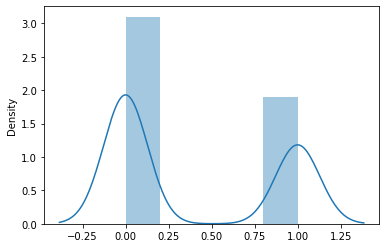

In [57]:
sns.distplot(y_pred)

In [58]:
print(confusion_matrix(y_pred, y_valid))

[[463  22]
 [ 13 284]]


In [59]:
print(classification_report(y_pred,y_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       485
         1.0       0.93      0.96      0.94       297

    accuracy                           0.96       782
   macro avg       0.95      0.96      0.95       782
weighted avg       0.96      0.96      0.96       782



In [61]:
df_test=pd.read_csv(r"test_set.csv")
df_test

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.00,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.00,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.00,0.000,0.388,0.000,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.30,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.00,0.000,0.065,0.000,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.20,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.00,0.000,0.110,0.000,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.00,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.00,0.000,0.364,0.000,0.729,0.121,0.000,7.781,32,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,686,0.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.25,...,0.00,0.301,0.473,0.043,0.043,0.000,0.000,2.111,17,190
687,687,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,2.56,0.000,0.000,0.000,0.375,0.000,0.000,2.250,7,36
688,688,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,2.333,5,7
689,689,0.08,0.08,0.57,0.0,0.48,0.00,0.00,0.08,0.00,...,0.08,0.011,0.034,0.000,0.057,0.022,0.000,1.875,65,542


In [62]:
df_test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [63]:
df_test.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
dtype: int64

In [64]:
y_test_prediction = best_pipe.predict(df_test)
y_test_prediction

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1.

<AxesSubplot:ylabel='Density'>

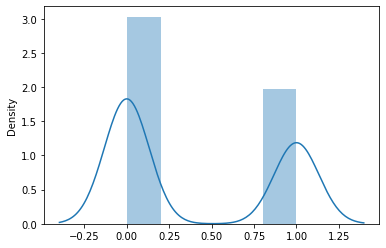

In [65]:
sns.distplot(y_test_prediction)

In [66]:
df_test['Prediction'] = y_test_prediction
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Prediction
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0.0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1.0
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1.0
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1.0
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,1.0


In [67]:
prediction = df_test[['Prediction']]
prediction = prediction.astype(int)
prediction

,Prediction
0,0
1,1
2,1
3,1
4,1
...,...
686,0
687,0
688,0
689,0


In [68]:
df_test.to_csv('AI_assignment_prediction.csv')

In [69]:
import pickle
file=open('AI_assignment.pkl','wb')
pickle.dump(best_pipe,file)